<b><font face="Book Antiqua" size="6" >Exploratory Data Analysis & Visualization</b></font>

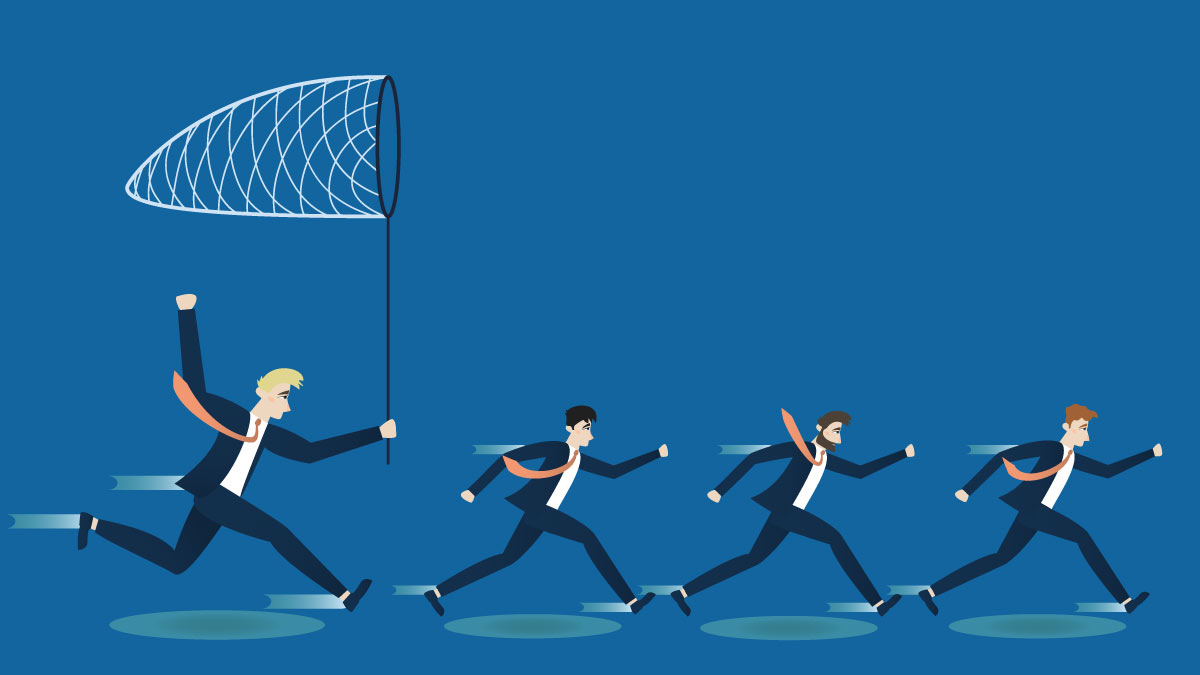

<font face="Monotype Corsiva" size=8 color=Blue> <b><center> Telecom Churn Analysis
    
<font face="Tahoma" size=6 color=red><left> Suraj S
    
<font face="Tahoma" size=6 color=red><left> Batch DS06

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./telecom_churn.csv')

<font face= 'Palatino Linotype' size=3>
''' 
       Purpose of Analysis
    
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.



<font face="Book Antiqua" size=3> <b><center>Data Cleaning

In [3]:
df.isna().mean()*100

Customer ID                   0.000000
Gender                        0.000000
Age                           0.000000
Married                       0.000000
 Dependents                   0.000000
Zip Code                      0.000000
Offer                         0.000000
Avg_Long_Distance_Charges     9.683374
Internet Service              0.000000
Avg Monthly GB Download      21.666903
Unlimited Data               21.666903
Contract                      0.000000
Monthly Charge                0.000000
Total Charges                 0.000000
Total Extra Data Charges      0.000000
Long Distance                 0.000000
Customer Status               0.000000
Churn Category               73.463013
 Reason                      73.463013
dtype: float64

<font face="Eras Light ITC" size=3>
    The columns namely <br> 
Avg Monthly GB Download      21.666903<br> 
Streaming TV                 21.666903<br> 
Streaming Movies             21.666903<br> 
Streaming Music              21.666903<br> 
Unlimited Data               21.666903<br> 

showed presence of null value more than 20% 

In [4]:
#Renaming Columns
df.rename(columns={"Avg Monthly GB Download":"Avg_Monthly_GB_Download","Streaming TV":"Streaming_TV",'Streaming Movies':'Streaming_Movies','Streaming Music':'Streaming_Music','Unlimited Data':'Unlimited_Data'},inplace=True)

In [5]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', ' Dependents', 'Zip Code',
       'Offer', 'Avg_Long_Distance_Charges', 'Internet Service',
       'Avg_Monthly_GB_Download', 'Unlimited_Data', 'Contract',
       'Monthly Charge', 'Total Charges', 'Total Extra Data Charges',
       'Long Distance', 'Customer Status', 'Churn Category', ' Reason'],
      dtype='object')

In [6]:
#dropping the columns with more than allowed null value
df.drop(columns=[ 'Avg_Long_Distance_Charges','Unlimited_Data'],inplace=True)

In [7]:
df.duplicated().sum()

0

<font face="Eras Light ITC" size=3> Inference: No Data duplication

<font face="Book Antiqua" size=3> <b><center>Info and Statistical Description

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               7043 non-null   object 
 1   Gender                    7043 non-null   object 
 2   Age                       7043 non-null   int64  
 3   Married                   7043 non-null   object 
 4    Dependents               7043 non-null   int64  
 5   Zip Code                  7043 non-null   int64  
 6   Offer                     7043 non-null   object 
 7   Internet Service          7043 non-null   object 
 8   Avg_Monthly_GB_Download   5517 non-null   float64
 9   Contract                  7043 non-null   object 
 10  Monthly Charge            7043 non-null   float64
 11  Total Charges             7043 non-null   float64
 12  Total Extra Data Charges  7043 non-null   int64  
 13  Long Distance             7043 non-null   float64
 14  Customer

In [9]:
df.head(5)

,Customer ID,Gender,Age,Married,Dependents,Zip Code,Offer,Internet Service,Avg_Monthly_GB_Download,Contract,Monthly Charge,Total Charges,Total Extra Data Charges,Long Distance,Customer Status,Churn Category,Reason
0,0002-ORFBO,Female,37,Yes,0,93225,None,Yes,16.0,One Year,65.6,593.30,0,381.51,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,91206,None,Yes,10.0,Month-to-Month,-4.0,542.40,10,96.21,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,92627,Offer E,Yes,30.0,Month-to-Month,73.9,280.85,0,134.60,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,94553,Offer D,Yes,4.0,Month-to-Month,98.0,1237.85,0,361.66,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,93010,None,Yes,11.0,Month-to-Month,83.9,267.40,0,22.14,Churned,Dissatisfaction,Network reliability


In [10]:
df.sample(10)

,Customer ID,Gender,Age,Married,Dependents,Zip Code,Offer,Internet Service,Avg_Monthly_GB_Download,Contract,Monthly Charge,Total Charges,Total Extra Data Charges,Long Distance,Customer Status,Churn Category,Reason
6964,9881-VCZEP,Female,29,Yes,0,95126,None,Yes,59.0,Month-to-Month,54.10,1373.00,110,303.00,Stayed,NaN,NaN
5588,7869-ZYDST,Male,33,Yes,0,96046,None,Yes,21.0,Month-to-Month,59.05,1882.80,0,890.32,Stayed,NaN,NaN
2119,3045-XETSH,Female,34,No,0,93532,None,Yes,21.0,Month-to-Month,94.85,953.45,0,432.60,Churned,Competitor,Competitor offered more data
3751,5286-YHCVC,Male,58,Yes,0,93242,None,Yes,15.0,Two Year,104.80,7470.10,0,2915.28,Stayed,NaN,NaN
2536,3633-CDBUW,Male,25,No,1,95345,None,Yes,73.0,One Year,80.85,1445.95,50,780.64,Stayed,NaN,NaN
3101,4446-BZKHU,Male,44,Yes,0,94523,None,Yes,24.0,Month-to-Month,105.55,6281.45,0,2787.70,Churned,Competitor,Competitor had better devices
491,0722-TROQR,Female,68,No,0,95616,None,Yes,29.0,Month-to-Month,74.90,321.75,0,104.92,Churned,Price,Lack of affordable download/upload speed
560,0824-VWDPO,Female,58,No,0,95519,None,Yes,30.0,One Year,96.75,4442.75,0,70.65,Stayed,NaN,NaN
1371,2037-SGXHH,Male,25,Yes,0,95226,None,Yes,30.0,Month-to-Month,94.65,3624.30,0,1888.60,Churned,Other,Don't know
4543,6402-ZFPPI,Female,75,No,0,95628,None,Yes,30.0,Month-to-Month,102.80,2660.20,0,912.50,Churned,Price,Price too high


In [11]:
df.describe()

,Age,Dependents,Zip Code,Avg_Monthly_GB_Download,Monthly Charge,Total Charges,Total Extra Data Charges,Long Distance
count,7043.000000,7043.000000,7043.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,26.189958,63.596131,2280.381264,6.860713,749.099262
std,16.750352,0.962802,1856.767505,19.586585,31.204743,2266.220462,25.104978,846.660055
min,19.000000,0.000000,90001.000000,2.000000,-10.000000,18.800000,0.000000,0.000000
25%,32.000000,0.000000,92101.000000,13.000000,30.400000,400.150000,0.000000,70.545000
50%,46.000000,0.000000,93518.000000,21.000000,70.050000,1394.550000,0.000000,401.440000
75%,60.000000,0.000000,95329.000000,30.000000,89.750000,3786.600000,0.000000,1191.100000
max,80.000000,9.000000,96150.000000,85.000000,118.750000,8684.800000,150.000000,3564.720000


<font face="Book Antiqua" size=3> <b><center>Visualizing data

In [12]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', ' Dependents', 'Zip Code',
       'Offer', 'Internet Service', 'Avg_Monthly_GB_Download', 'Contract',
       'Monthly Charge', 'Total Charges', 'Total Extra Data Charges',
       'Long Distance', 'Customer Status', 'Churn Category', ' Reason'],
      dtype='object')

In [13]:
#Renaming Columns
df.rename(columns= {"Customer Status":'Churn'}, inplace=True)

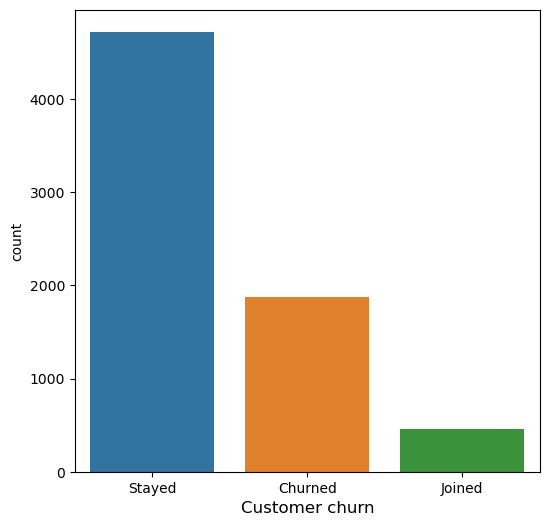

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x = df.Churn)
plt.xlabel('Customer churn', fontsize= 12)
plt.show()

<font face="Eras Light ITC" size=3> Inference:There is imbalance

In [15]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', ' Dependents', 'Zip Code',
       'Offer', 'Internet Service', 'Avg_Monthly_GB_Download', 'Contract',
       'Monthly Charge', 'Total Charges', 'Total Extra Data Charges',
       'Long Distance', 'Churn', 'Churn Category', ' Reason'],
      dtype='object')

In [16]:
cust_No=df["Customer ID"].size

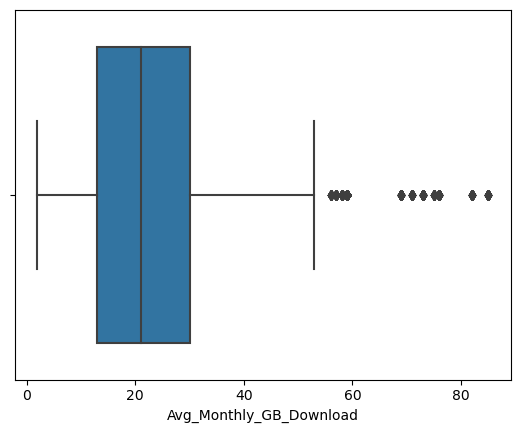

In [17]:
sns.boxplot(x = 'Avg_Monthly_GB_Download', data = df);

<font face="Eras Light ITC" size=3> A histogram groups values into bins of equal value range. The shape of the histogram provides the clues about the underlying distribution type.

<AxesSubplot:>

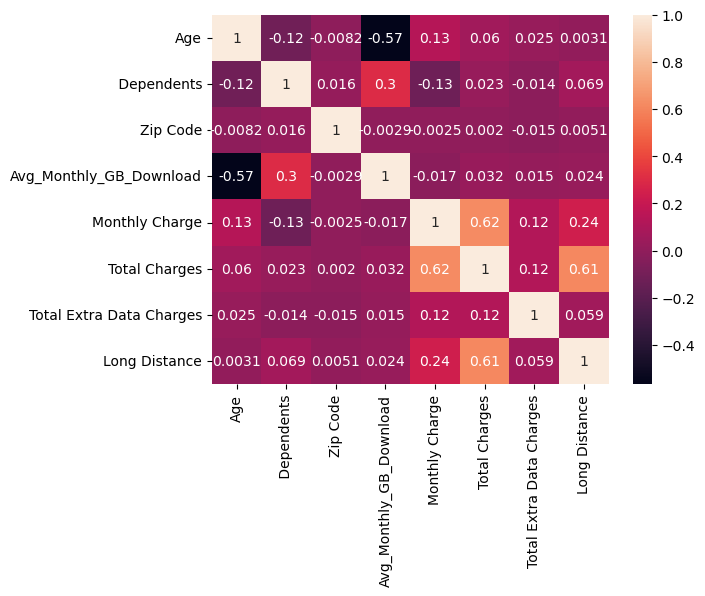

In [19]:
sns.heatmap(df.corr(),annot=True)

<font face="Eras Light ITC" size=3>No correlation found from the heat map other than ISD call- Total Charge relation

In [20]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', ' Dependents', 'Zip Code',
       'Offer', 'Internet Service', 'Avg_Monthly_GB_Download', 'Contract',
       'Monthly Charge', 'Total Charges', 'Total Extra Data Charges',
       'Long Distance', 'Churn', 'Churn Category', ' Reason'],
      dtype='object')

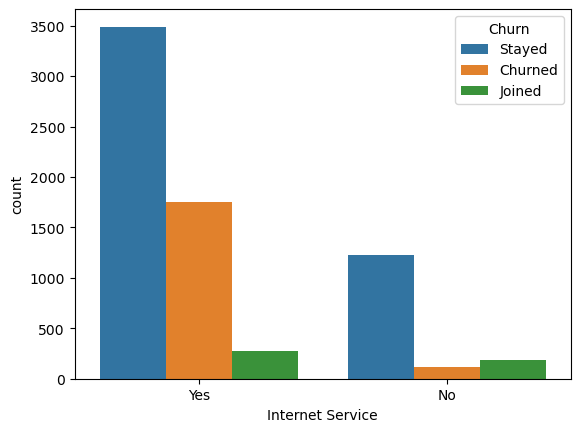

In [21]:
sns.countplot(x='Internet Service', hue='Churn', data=df);

<font face="Eras Light ITC" size=3>Those who used Internet services more stayed on the network.


In [28]:
df.rename(columns= {"Long Distance":'LongDistance'}, inplace=True)

NameError: name 'x' is not defined

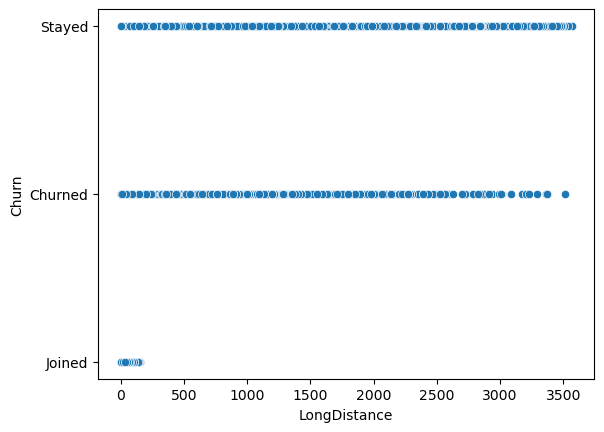

In [30]:
fig = plt.figure()
fig = sns.scatterplot(df.LongDistance,df.Churn)
plt.xlabel(x,fontsize= 14)
plt.ylabel(y,fontsize= 14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.title("Relation",fontsize = 16)
plt.show()

<font face="Eras Light ITC" size=3>Unable to deduce any relation

In [32]:
df.rename(columns= {"Zip Code":'Zip_Code'}, inplace=True)

NameError: name 'x' is not defined

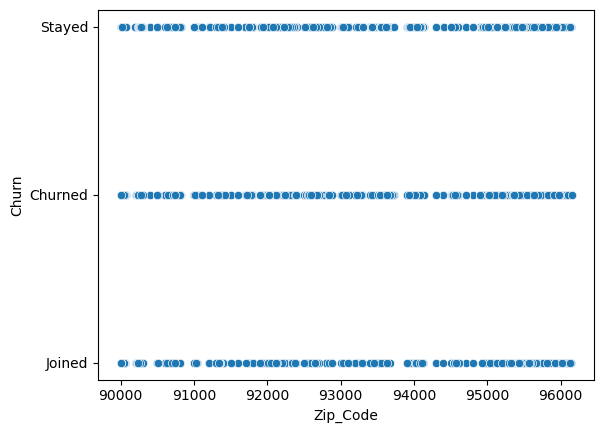

In [33]:
fig = plt.figure()
fig = sns.scatterplot(df.Zip_Code,df.Churn)
plt.xlabel(x,fontsize= 14)
plt.ylabel(y,fontsize= 14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.title("Relation",fontsize = 16)
plt.show()

In [ ]:
df.query('')